In [65]:
import sys
sys.path.insert(0, '../src/')
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.metrics import pairwise_distances
from sklearn.pipeline import Pipeline
from preprocessing import BagOfNotes, MidiPathToDataFrame, PreprocessMidiDataFrame

In [2]:
data_dir = Path('../maestro/maestro-v3.0.0/')
df = pd.read_csv(data_dir / 'maestro-v3.0.0.csv')

In [8]:
p = Pipeline([
    ('load', MidiPathToDataFrame(data_dir)),
    ('clean', PreprocessMidiDataFrame()),
    ('bon', BagOfNotes()),
])
transformed = p.transform(df.midi_filename)

C:\Users\benkc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


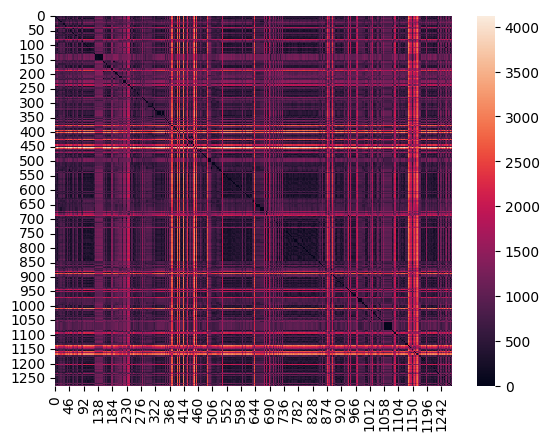

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

dist = pairwise_distances(transformed)
sns.heatmap(dist)
plt.show()

In [23]:
df[dist[5] < 160]

,canonical_composer,canonical_title,split,year,midi_filename,audio_filename,duration
5,Alexander Scriabin,"5 Preludes, Op.15",validation,2009,2009/MIDI-Unprocessed_07_R1_2009_04-05_ORIG_MI...,2009/MIDI-Unprocessed_07_R1_2009_04-05_ORIG_MI...,400.557826
738,Johann Sebastian Bach,"Prelude and Fugue in A Major, WTC I, BWV 864",train,2015,2015/MIDI-Unprocessed_R1_D2-13-20_mid--AUDIO-f...,2015/MIDI-Unprocessed_R1_D2-13-20_mid--AUDIO-f...,211.635417


In [27]:
df[dist[738] < 160][['canonical_composer', 'canonical_title', 'audio_filename']]

,canonical_composer,canonical_title,audio_filename
5,Alexander Scriabin,"5 Preludes, Op.15",2009/MIDI-Unprocessed_07_R1_2009_04-05_ORIG_MID--AUDIO_07_R1_2009_07_R1_2009_04_WAV.wav
36,Alexander Scriabin,"Two Impromptus, Op. 14 (Complete)",2014/MIDI-UNPROCESSED_14-15_R1_2014_MID--AUDIO_15_R1_2014_wav--3.wav
738,Johann Sebastian Bach,"Prelude and Fugue in A Major, WTC I, BWV 864",2015/MIDI-Unprocessed_R1_D2-13-20_mid--AUDIO-from_mp3_16_R1_2015_wav--1.wav
739,Johann Sebastian Bach,"Prelude and Fugue in A Major, WTC II, BWV 888",2015/MIDI-Unprocessed_R1_D2-13-20_mid--AUDIO-from_mp3_13_R1_2015_wav--1.wav
755,Johann Sebastian Bach,"Prelude and Fugue in B Minor, WTC II",2008/MIDI-Unprocessed_06_R1_2008_01-04_ORIG_MID--AUDIO_06_R1_2008_wav--1.wav
756,Johann Sebastian Bach,"Prelude and Fugue in B Minor, WTC II",2008/MIDI-Unprocessed_09_R1_2008_01-05_ORIG_MID--AUDIO_09_R1_2008_wav--1.wav
757,Johann Sebastian Bach,"Prelude and Fugue in B Minor, WTC II, BWV 893",2013/ORIG-MIDI_03_7_6_13_Group__MID--AUDIO_10_R1_2013_wav--1.wav
783,Johann Sebastian Bach,"Prelude and Fugue in D Major, WTC I, BWV 850",2011/MIDI-Unprocessed_18_R1_2011_MID--AUDIO_R1-D7_07_Track07_wav.wav
784,Johann Sebastian Bach,"Prelude and Fugue in D Major, WTC I, BWV 850",2017/MIDI-Unprocessed_053_PIANO053_MID--AUDIO-split_07-06-17_Piano-e_3-04_wav--1.wav
787,Johann Sebastian Bach,"Prelude and Fugue in D Major, WTC II, BWV 874",2011/MIDI-Unprocessed_01_R1_2011_MID--AUDIO_R1-D1_02_Track02_wav.wav


In [26]:
pd.set_option('display.max_colwidth', None)

In [28]:
no_dup_exact = df.drop_duplicates(subset=['canonical_title'])

In [29]:
df.shape

(1276, 7)

In [30]:
no_dup_exact.shape

(854, 7)

In [33]:
mask = df.index.isin(no_dup_exact.index)

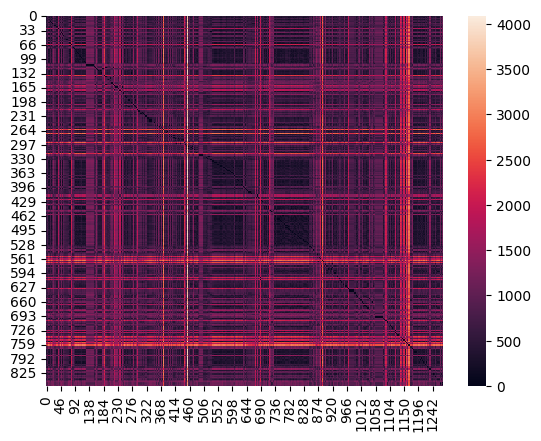

In [35]:
sns.heatmap(dist[mask])
plt.show()

In [60]:
import string
from unidecode import unidecode

name_cleaned = no_dup_exact.canonical_title.str.lower().str.translate(str.maketrans('', '', string.punctuation)).str.replace(' ', '').apply(unidecode)
name_cleaned.value_counts()

canonical_title
impromptuop142no3inbflatmajord935    5
impromptuop90no3ingflatmajord899     4
thirtytwovariationsincminorwoo80     4
sonataingmajord894                   4
variationsserieusesop54              4
                                    ..
momentmusicalop94no3infsharpminor    1
liebesfreud                          1
12etudesop25                         1
24preludesop28                       1
twelvevariationsk179189a             1
Name: count, Length: 760, dtype: int64

In [61]:
no_dup_exact['name_cleaned'] = name_cleaned
cleaned = no_dup_exact.drop_duplicates(subset='name_cleaned')
cleaned.shape

C:\Users\benkc\AppData\Local\Temp\ipykernel_16368\3589684947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_dup_exact['name_cleaned'] = name_cleaned


(760, 8)

In [62]:
cleaned.iloc[:, :-1].to_csv('no_dups.csv')

In [66]:
def categorize(title) -> str:
    name = unidecode(title.lower())
    cats = [
        'etude', 'ballad', 'prelude', 'waltz', 'polonaise', 'nocturne', 'mazurka', 'scherzo', 'sonata',
    ]
    for c in cats:
        if c in name:
            return c
    return np.nan

df['category'] = df.canonical_title.apply(categorize)
df.category.value_counts(dropna=False)

category
NaN          433
sonata       407
prelude      162
etude        155
scherzo       31
ballad        28
polonaise     21
nocturne      19
waltz         13
mazurka        7
Name: count, dtype: int64

In [68]:
df[['canonical_title', 'category']].dropna().drop_duplicates().to_csv('categories.csv', index=False)